In [50]:
# Imports
import numpy as np
import csv
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler

In [51]:
# Load data train and test
train = pd.read_csv(os.path.join("cs5228", "train.csv"))
X_train = train.drop(["exceeds50K"], axis=1)
y_train = train["exceeds50K"]
X_test = pd.read_csv(os.path.join("cs5228", "test.csv"))
print(list(X_train.columns))
print(X_train.shape, X_test.shape)

['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']
(24421, 13) (24421, 13)


(103, 103)


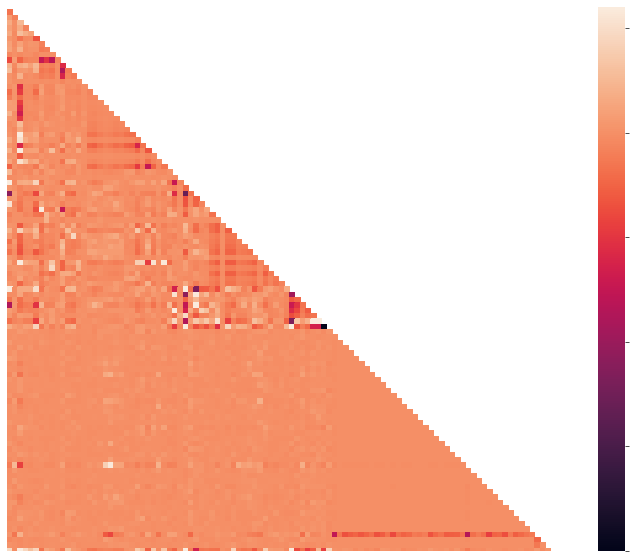

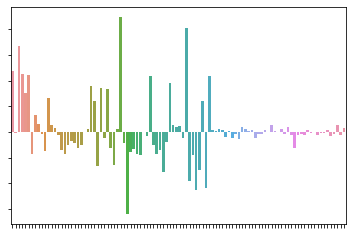

In [62]:
sns.barplot(corr.columns[:-1], corr["exceeds50K"][:-1])

In [63]:
corr.sort_values(by ='exceeds50K', ascending=False)["exceeds50K"].drop("exceeds50K")

marital-status_ Married-civ-spouse    0.448170
relationship_ Husband                 0.405638
education-num                         0.333001
age                                   0.237521
capital-gain                          0.226486
                                        ...   
occupation_ Other-service            -0.156292
relationship_ Not-in-family          -0.188456
sex_ Female                          -0.218607
relationship_ Own-child              -0.226400
marital-status_ Never-married        -0.320208
Name: exceeds50K, Length: 102, dtype: float64

In [48]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=0, n_estimators=100)
cv_score_base = cross_val_score(clf, X_train, y_train, cv=5, verbose=6, scoring='f1_macro')
print(cv_score_base.mean(), cv_score_base.std())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] .................................... , score=0.783, total=   3.3s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.3s remaining:    0.0s


[CV] .................................... , score=0.810, total=   3.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.3s remaining:    0.0s


[CV] .................................... , score=0.783, total=   3.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    9.4s remaining:    0.0s


[CV] .................................... , score=0.784, total=   3.2s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   12.6s remaining:    0.0s


[CV] .................................... , score=0.779, total=   3.6s
0.7879283957699973 0.011160521028962495


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   16.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   16.2s finished


In [35]:
# random forest

X_train = pd.get_dummies(X_train)
clf = RandomForestClassifier(random_state=0, n_estimators=100)
clf.fit(X_train_encoded, y_train)
print(clf.feature_importances_)

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov',
       'workclass_ Local-gov', 'workclass_ Never-worked',
       ...
       'native-country_ Portugal', 'native-country_ Puerto-Rico',
       'native-country_ Scotland', 'native-country_ South',
       'native-country_ Taiwan', 'native-country_ Thailand',
       'native-country_ Trinadad&Tobago', 'native-country_ United-States',
       'native-country_ Vietnam', 'native-country_ Yugoslavia'],
      dtype='object', length=102)
[2.48317917e-02 1.14974472e-02 2.48115621e-02 4.23541872e-02
 1.02722493e-02 1.69576835e-02 4.73426843e-04 9.53553438e-04
 7.62845571e-04 0.00000000e+00 1.43568707e-03 1.51447660e-03
 1.48178778e-03 6.10576570e-04 1.23940921e-05 2.76899467e-04
 7.63504443e-04 1.37918290e-04 5.77240767e-05 1.89173252e-04
 5.60560174e-04 2.49091910e-04 2.97743608e-04 4.63949376e-04
 5.25489334e-03 9.94825959e-04 3.11610207e-03 4.26731654e-03
 1.

In [37]:
## Create a parameter grid for gridsearch

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
n_estimators = n_estimators + [int(x) for x in np.linspace(start = 10, stop = 200, num = 20)]
# Number of features to consider at every split
max_features = ['auto', None]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(3, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200], 'max_features': ['auto', None], 'max_depth': [3, 13, 24, 35, 45, 56, 67, 77, 88, 99, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [40]:
## Use the random grid to search for best hyperparameters
from sklearn.model_selection import RandomizedSearchCV

# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, search across n_iter different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 200, cv = 3, verbose=6, random_state=0, n_jobs = 8)
# Fit the random search model
rf_random.fit(X_train, y_train)
# Print best parameters according to gridsearch
rf_random.best_params_

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.


KeyboardInterrupt: 

In [ ]:
## Evaluate improvment between the base model and the fine-tuned model

base_model = RandomForestClassifier(n_estimators=100, random_state=42)
base_model.fit(X_new_st, labels)
base_accuracy = accuracy_score(test_labels, base_model.predict(test_features))
print(base_accuracy)
# base_accuracy = evaluate(base_model, test_features, test_labels)

best_random = rf_random.best_estimator_
# random_accuracy = evaluate(best_random, test_features, test_labels)
random_accuracy = accuracy_score(test_labels, best_random.predict(test_features))
print(random_accuracy)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))